## Méthodes probabilistes utilisées et retrouvés dans le programme ZuPer

Le programme ZuPer comprend des méthodes dites "stochastiques" pour définir des valeurs aléatoires concernant les paramètres géologiques et hydrogéologiques. Deux type de méthode sont utilisé dans le programme permettant soit de définir une seule valeur ou une liste de valeur. Ceci selon le fonctionnement de la méthode de délimitation choisie et sont :

<ul>
    <li>La simulation séquentielle gausienne (SGS)</li>
    <li>La méthode du Bootstrap</li>
</ul>

### Simulation séquentielle gausienne (SGS)

La simulation séquentielle gausienne est une méthode permettant de définir une liste de valeur aléatoire de deux façons. La première consiste à calculer cette liste seulement avec la position du puits. La second se fait avec une liste de données dites "conditionnantes" comprenant aussi la position du puits. Cette méthode de simulation provient du module Geone (https://github.com/randlab/geone.git).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ifm as ifm
import geone as gn

In [10]:
def simulation_sgs(nx, ny, x, v, mu, std, seed=None):
    if x is None:
        return gn.geosclassicinterface.simulate2D(cov, (nx, ny), (dx, dy), (ox, oy), x = x*np.array([dx, dy]), v = v, mean=mu, var=std**2, seed=seed, verbose=0)['image'].val[0][0]
        
    return gn.geosclassicinterface.simulate2D(cov, (nx, ny), (dx, dy), (ox, oy), x = x*np.array([dx,dy]), v = v, mean=mu, var=std**2, seed=seed, verbose=0)['image'].val[0][0]

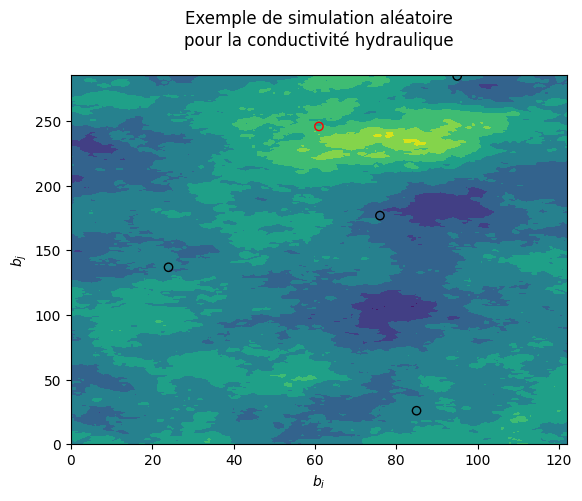

In [35]:
global cov, dx, dy, ox, oy
nx, ny = 123, 287
x,v = np.array([[24, 137], [95, 285], [76, 177], [85, 26], [61, 246]]), [1.8, 2, 1.5, 1.78, 2.5]
mu, std = 1.8, 0.35
dx, dy = 24, 24
ox, oy = 0, 0
cov = gn.covModel.CovModel2D(
    elem= [('spherical', {'w':0.25, 'r':[1300, 1300]})],
    alpha=0,
    name=None
)

res = simulation_sgs(nx, ny, x, v, mu, std)

plt.contourf(res)
plt.scatter(x[:-1,0], x[:-1,1], facecolors='none', edgecolors='black')
plt.scatter(x[-1,0], x[-1,1], facecolors='none', edgecolors='red')
plt.xlabel(r"$b_{i}$")
plt.ylabel(r"$b_{j}$")
plt.title("Exemple de simulation aléatoire\npour la conductivité hydraulique\n") 
plt.show()

### Méthode du Bootstrap

La méthode du bootstrap est une méthode permettant de définir une valeur aléatoire à partir d'une liste de données conditionnantes (https://dx.doi.org/10.2307/2958830). Elles sont utilisé pour des méthode de délimitation qui ne prennent pas en compte l'hétérogénéité des paramètres (solutions analytiques ou semi-analytique, méthode CFR). 

In [36]:
def bootstrap_intervalle_conf(data, niter, func):
    m = np.zeros(niter)
    for i in range(niter):
        bootstrap_echantillon = np.random.choice(data, len(data), replace=True)
        m[i] = func(bootstrap_echantillon, axis=None)

    return m[0]

In [45]:
v = [1.8, 2, 1.5, 1.78, 2.5]
niter = 1
func = np.mean

print("Valeur des données conditionnantes de base : ",v, "log10(m/d)")
print("\n\nNouvelle valeur aléatoire après échantillonnage : ", bootstrap_intervalle_conf(v, niter, func), "log10(m/d)")

Valeur des données conditionnantes de base :  [1.8, 2, 1.5, 1.78, 2.5] log10(m/d)


Nouvelle valeur aléatoire après échantillonnage :  1.86 log10(m/d)
